# Preparación de los datos

Este notebook se ha diseñado con la intención de preparar los distintos dataset y realizar un análsis preliminar de su contenido

El notebook se organiza en distintas fases:
1. Descargar los datos
1. Instalación de dependencias
3. Análisis del texto a nivel general
4. Análisis del texto por tareas
  1. Clasificación binaria
  2. Clasificación multi-etiquetado
  3. Regresión

## Descargar los datos

El primer paso consiste en descargar los dataset de sus respectivos repositorios. Para ello existen 2 alternavias:

- Subir los datos a google drive y leerlos como si fuese un fichero en disco
- Subirlos a un repositorio de huggingface y descargarlos desde ahí

Aunque en el notebook estén las dos opciones, con realizar una es suficiente

### Descarga desde google drive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

In [ ]:
PATH= '/content/drive/My Drive/trabajos/dataset-PNL/dataset/train.csv'
os.path.isfile(PATH)

### Descarga desde huggingface

In [ ]:
!pip install --upgrade huggingface_hub
from huggingface_hub import notebook_login
# Notebook login via HF's token
notebook_login()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.4 MB/s eta 0:00:00


## Instalación de librerias

In [ ]:
!pip install nltk
!pip install datasets
!pip install squarify
!pip install venn
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datasets as ds
import squarify
from venn import venn
from venn import generate_petal_labels, draw_venn, generate_colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-p

## Análisis del texto a nivel general

En esta sección leemos lod dataset, declaramos algunas variables necesarias y comenzamos con el análisis preliminar.

Se vuelven a mostrar dos métodos para leer los dataset. El primero por google drive y el segundo por huggingface

### Google drive


In [ ]:
files_name = "train", "validation", "test"
PATH= '/content/drive/My Drive/trabajos/dataset-PNL/dataset/{}'
dataset = []
for file_name in files_name:
  if os.path.isfile(PATH.format(file_name)):
    dataset.append(pd.read_csv(PATH, encoding="utf-8"))
  else:
    dataset.append(None)
train, validation, test = dataset



### huggingface

In [ ]:
train = pd.DataFrame(ds.load_dataset("huhu2023/bin-huhu2023", split="train"))
val = pd.DataFrame(ds.load_dataset("huhu2023/bin-huhu2023", split="validation"))
test = pd.DataFrame(ds.load_dataset("huhu2023/bin-huhu2023", split="test"))

total = pd.concat([train, val, test])


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/huhu2023___csv/huhu2023--bin-huhu2023-1e6f2f1b5c02adbb/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


### Definicion de constantes

En esta celda se están definiendo las constantes necesarias para establecer un tamaño correcto de las imágenes. Las siete constantes permiten generar imágenes que se adecueen mejor a las necesidades de las gráficas


In [ ]:
BAR_SIZE = 0.8
IMAGE_SIZE_SM = (5, 3)
IMAGE_SIZE_XSM = (5, 6)
IMAGE_SIZE_MD = (10, 3)
IMAGE_SIZE_XMD = (10, 5)
IMAGE_SIZE_BG = (20, 3)
IMAGE_SIZE_XBG = (20, 6)
IMAGE_SIZE_XXBG = (30, 12)

## Distribución del texto

Primero obtenemos el número total de instancias por cada conjunto y subconjunto

In [ ]:
total.head()

,index,tweet,humor,prejudice_woman,prejudice_lgbtiq,prejudice_inmigrant_race,gordofobia,mean_prejudice,length
0,32261,MENTION La primera vez podría tomarse como que...,0,1,0,0,0,1.8,39
1,67362,¿Por qué Ricky Martin tardó tanto en salir del...,1,0,1,0,0,2.4,17
2,9818,"Van a cambiar las señales, porque un niño cogi...",0,1,0,0,0,2.0,28
3,4920,En que se parece una sirena y un transexual? E...,1,0,1,0,0,3.8,19
4,13205,La pelotuda esta MENTION comenzó todo ahora c...,0,1,0,0,0,2.4,44


In [ ]:
print(len(total))
print(len(train))
print(len(val))
print(len(test))

2671
1869
535
267


In [ ]:
nltk.download("punkt")
tokenizer_es = nltk.data.load('tokenizers/punkt/spanish.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
get_length = lambda text: len(nltk.word_tokenize(text))
total["length"] = total["tweet"].apply(get_length)
train["length"] = train["tweet"].apply(get_length)
val["length"] = val["tweet"].apply(get_length)

In [ ]:
print(total["length"].describe())
print(train["length"].describe())
print(val["length"].describe())

count    2671.000000
mean       26.274803
std        14.367831
min         1.000000
25%        15.000000
50%        23.000000
75%        34.000000
max        66.000000
Name: length, dtype: float64
count    1869.000000
mean       26.252006
std        14.284399
min         1.000000
25%        15.000000
50%        23.000000
75%        34.000000
max        66.000000
Name: length, dtype: float64
count    535.000000
mean      26.295327
std       14.804047
min        2.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       64.000000
Name: length, dtype: float64


Representación de la distribución del tamaño del texto

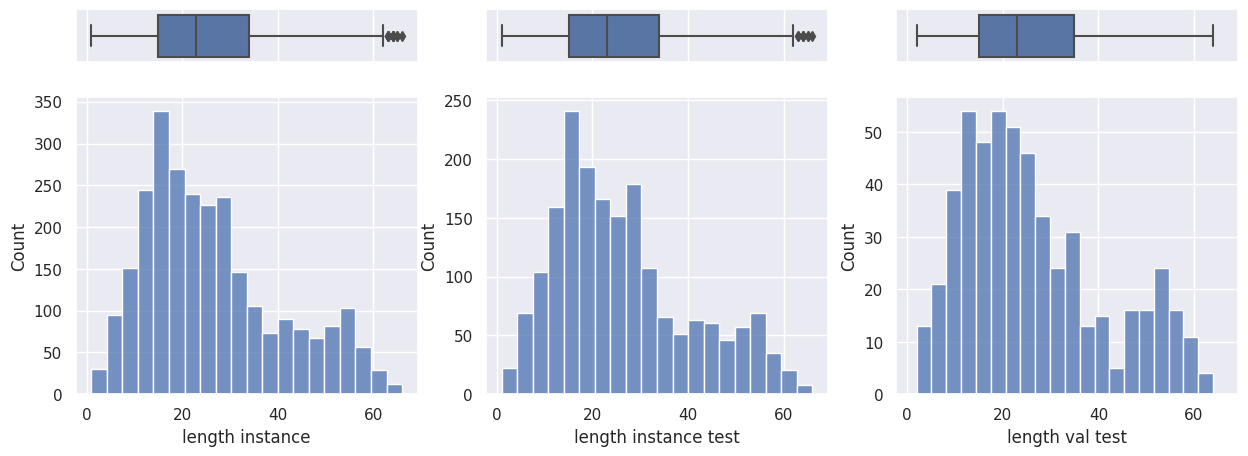

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
#f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
f, ((ax_box, ax_box1, ax_box2), (ax_hist, ax_hist1, ax_hist2)) = plt.subplots(2, 3, figsize=(15, 5), sharex=True, sharey=False, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(total, ax=ax_box, x="length")
sns.histplot(data=total, x="length", ax=ax_hist, bins=20)
sns.boxplot(train, ax=ax_box1, x="length")
sns.histplot(data=train, x="length", ax=ax_hist1, bins=20)
sns.boxplot(val, ax=ax_box2, x="length")
sns.histplot(data=val, x="length", ax=ax_hist2, bins=20)
# Remove x axis name for the boxplot
ax_box.set(xlabel="") # ambos
ax_hist.set(xlabel="length instance")

ax_box1.set(xlabel="")
ax_hist1.set(xlabel="length instance test")
ax_box2.set(xlabel="")
ax_hist2.set(xlabel="length val test")
plt.show()

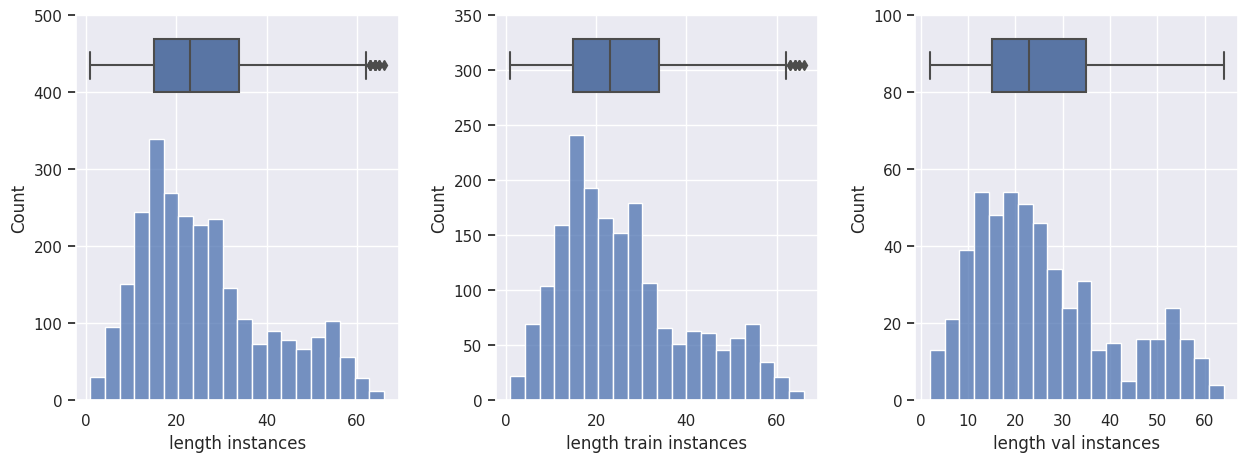

In [ ]:
# Set a gray background
sns.set(style="darkgrid")

# Create matplotlib with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Traverse each subplot
for data_name, data, max_value, ax in zip([" ", " train ", " val "],
                                          [total, train, val],
                                          [500, 350, 100],
                                          axes):
  # Histogram
  sns.histplot(data, ax=ax, x="length", bins=20)

  # Twinx ax to represent boxplot in right y-axis
  ax2 = ax.twinx()
  sns.boxplot(data, ax=ax2, x="length")

  # Move boxplot upwards and disable right y-axis ticks
  ax2.set_ylim([-5,.75])
  ax2.set_axis_off()

  # Resize left y-axis and set x-axis name
  ax.set_ylim([0,max_value])
  ax.set(xlabel=f"length{data_name}instances")

plt.subplots_adjust(wspace=0.3)
plt.show()

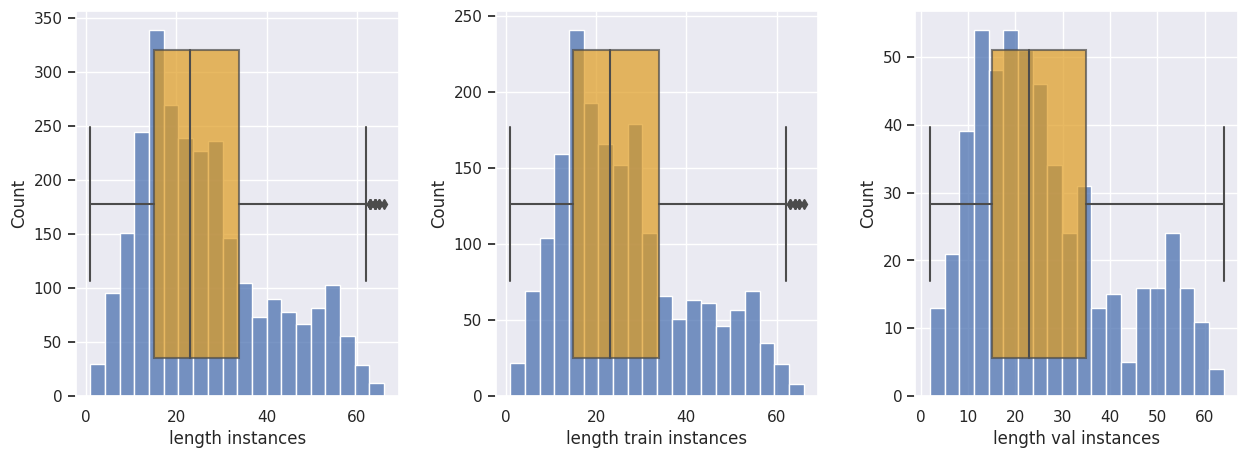

In [ ]:
# Set a gray background
sns.set(style="darkgrid")

# Create matplotlib with three subplots
f, axs = plt.subplots(1, 3, figsize=(15, 5))

# Traverse each subplot
for data_name, data, ax in zip([" ", " train ", " val "],
                               [total, train, val],
                               axs):
  # Histogram
  sns.histplot(data, ax=ax, x="length", bins=20)

  # Twinx axis and show Boxplot
  ax2 = ax.twinx()
  sns.boxplot(data, ax=ax2, x="length", boxprops=dict(alpha=.7), color="orange")
  ax2.set_axis_off()

  # Set x-axis names
  ax.set(xlabel=f"length{data_name}instances")

plt.subplots_adjust(wspace=0.3)
plt.show()

Como podemos observar, tanto en el gráfico con en la columna entrada anterior, el 75% de los tweets no superan 35 tokens. Esta información puede resultar útil a la hora de decidir el tamaño de la red de neuronas, o si fuese necesario establecer un máximo al tamaño de las oraciones.

Por otra parte, podemos observar tanto en el primer gráfico como en el segundo, como el número de instancias con mayor longitud disminuye en un mínimo local y vuelve a subir

## Análisis del texto por tareas

### 1. Clasificación binaria

Para la tarea de clasificación binaria es necesario conocer si está clasificado como humor o no, para ello nos podemos quedar con el texto y la etiqueta 'humor'

Además de renombrar y aislar las columnas, también cambiamos el valor por un texto para que resulte más sencilla su visualización

In [ ]:
df_binary = total[["tweet", "humor", "length"]]
df_binary = df_binary.rename(columns={"tweet": "Text", "humor": "label"})
df_binary.loc[df_binary["label"] == 0, "label"] = "no-humor"
df_binary.loc[df_binary["label"] == 1, "label"] = "humor"
df_binary.head()

,Text,label,length
0,Si mi cuerpo está compuesto en un 70% por agua...,humor,20
1,"—Doctor, últimamente me veo feo y gordo. ¿Qué ...",humor,16
2,- Un aplauso para el asador\n- Callate gordo.....,humor,19
3,Me ven en bikini y me llevan a mundo marino.,humor,11
4,"MENTION Hombre deja la puta ladilla, que los c...",no-humor,14


In [ ]:
df_binary_train = train[["tweet", "humor", "length"]]
df_binary_train = df_binary_train.rename(columns={"tweet": "Text", "humor": "label"})
df_binary_train.loc[df_binary_train["label"] == 0, "label"] = "no-humor"
df_binary_train.loc[df_binary_train["label"] == 1, "label"] = "humor"
df_binary_train.head()

,Text,label,length
0,Si mi cuerpo está compuesto en un 70% por agua...,humor,20
1,"—Doctor, últimamente me veo feo y gordo. ¿Qué ...",humor,16
2,- Un aplauso para el asador\n- Callate gordo.....,humor,19
3,Me ven en bikini y me llevan a mundo marino.,humor,11
4,"MENTION Hombre deja la puta ladilla, que los c...",no-humor,14


In [ ]:
df_binary_val = val[["tweet", "humor", "length"]]
df_binary_val = df_binary_val.rename(columns={"tweet": "Text", "humor": "label"})
df_binary_val.loc[df_binary_val["label"] == 0, "label"] = "no-humor"
df_binary_val.loc[df_binary_val["label"] == 1, "label"] = "humor"
df_binary_val.head()

,Text,label,length
0,MENTION Ni que fuera 007 la gorda bailarina,no-humor,8
1,En la séptima habrá una gorda modelo de la que...,humor,21
2,- ¿¿Cuál es el colmo de una mujer muy gorda?? ...,humor,29
3,"– Amiga, si quieres adelgazar, te recomiendo 1...",humor,25
4,me da vergüenza comer en frente de la gente pe...,humor,30


#### Distribución de clases

In [ ]:
counts = df_binary["label"].value_counts()
counts_train = df_binary_train["label"].value_counts()
counts_val = df_binary_val["label"].value_counts()

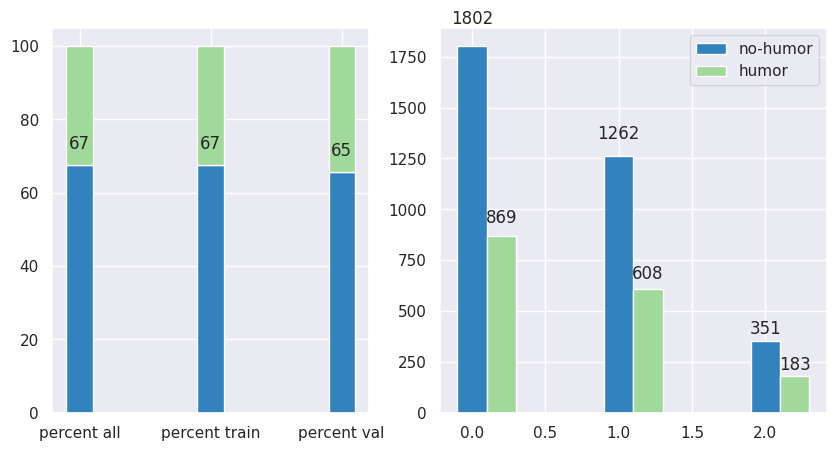

In [ ]:
cmap = plt.colormaps["tab20c"]
colors1 = [0, 10]*3
colors = cmap(colors1)
# Prepare percent stacket barplot
total = [counts["humor"] + counts["no-humor"], counts_train["humor"] + counts_train["no-humor"], counts_val["humor"] + counts_val["no-humor"]]
humor = [counts["humor"]/total[0]*100, counts_train["humor"]/total[1]*100, counts_val["humor"]/total[2]*100]
no_humor = [counts["no-humor"]/total[0]*100, counts_train["no-humor"]/total[1]*100, counts_val["no-humor"]/total[2]*100]
fig, (ax, ax1) = plt.subplots(1,2, figsize=(10, 5), gridspec_kw={"width_ratios": (.45, .55)})
# plot
barWidth = 0.2
# Create green Bars
bars = ["percent", "no_humor", "humor"]
rects = ax.bar(["total", "train", "val"], no_humor, color=colors[0], edgecolor='white', width=barWidth)
ax.bar(["total", "train", "val"], humor, color=colors[1], edgecolor='white', width=barWidth, bottom=no_humor)
# ax.legend(labels=["no-humor", "humor"])
ax.set_xticks([0,1,2], ["percent all", "percent train", "percent val"])



bars = np.arange(3)
# ax1.bar(bars, [counts["no-humor"], counts["humor"], counts_train["no-humor"], counts_train["humor"], counts_val["no-humor"], counts_val["humor"]], edgecolor='white', width=0.2)
rects1 = ax1.bar(bars, [counts["no-humor"], counts_train["no-humor"], counts_val["no-humor"]], width=barWidth, color=colors[0])
rects2 = ax1.bar(bars+barWidth, [counts["humor"], counts_train["humor"], counts_val["humor"]], width=barWidth, color=colors[1])
ax1.legend((rects1, rects2), ("no-humor", "humor"))


def autolabel(rects, _ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        _ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects, ax)
autolabel(rects1, ax1)
autolabel(rects2, ax1)



En estas gráficas podemos ver como tanto el conjunto test y el conjunto validación están balanceados, habiendo casi un 30% de instancias etiquetadas como humor y el resto como no-humor

Otro aspecto interesante es ver como se distribuye la longitud del texto en función de la etiqueta que tenga. Para podemos emplear un diagrama de densidad

Text(0.5, 1.0, 'Distribución del tamaño de los textos para cada clase')

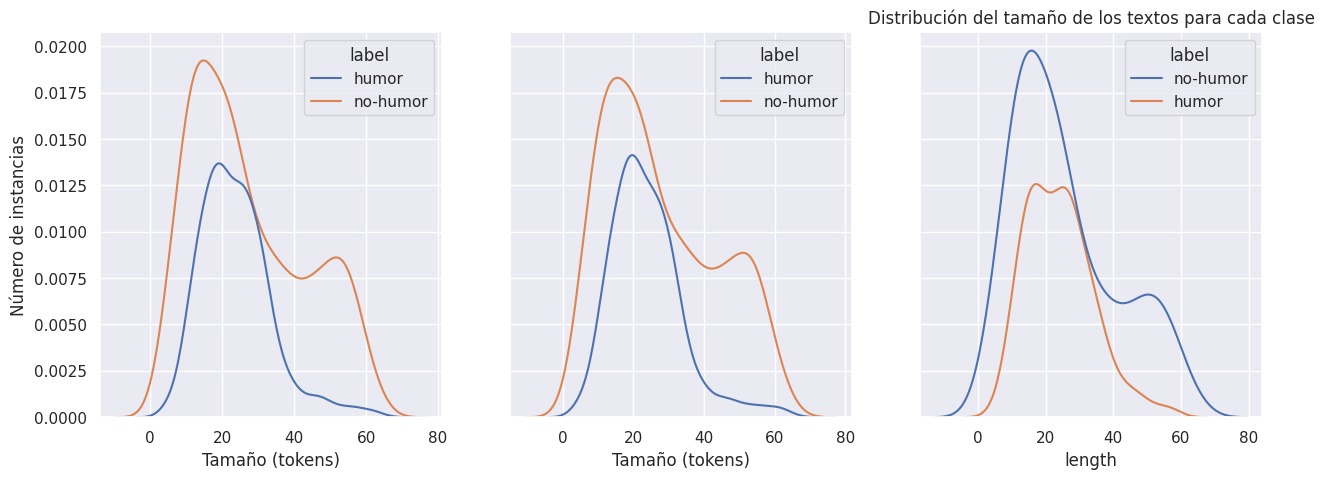

In [ ]:
from mpl_toolkits.mplot3d import axes3d
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.kdeplot(data=df_binary, x='length', hue='label', legend=True, ax=ax1)
sns.kdeplot(data=df_binary_train, x='length', hue='label', legend=True, ax=ax2)
sns.kdeplot(data=df_binary_val, x='length', hue='label', legend=True, ax=ax3)
ax1.set(xlabel = 'Tamaño (tokens)')
ax1.set(ylabel = 'Número de instancias')
ax2.set(xlabel = 'Tamaño (tokens)')
ax2.set(ylabel = 'Número de instancias')
plt.title('Distribución del tamaño de los textos para cada clase')

Como sucedía antes, obsevamos como en los tres casos la distribución es muy similar. Un aspecto que parece resaltar es la presencia de un mínumo local al rededor de la longitud 40 solo en las instancias etiquetadas como "*no-humor*". 

Esto puede deberse a que, efectivamente, exista una correlación entre el crecimiento expontáneo en la longitud del texto y la etiqueta "*no-humor*", o simplemente al hecho de haber mayor número de instancias

### 2. Multi-etiquetado

La segunda tarea consiste en multietiquetado. Cada instancia puede tener de 0 a n clases y hay que predecir a que clase pertenecen cada instancia

En el caso concreto que nos ocupa, puede tener hasta 4 clases distintas, siendo estas:
1. Machismo (prejudice_woman)
2. Prejuicio lgtbiq (prejudice_lgbtiq)
3. Racismo (prejudice_inmigrant_race)
4. gordofobia (gordofobia)

Para esta tarea vamos a ver que distribución sigue cada una de las clases. En este caso no se pueden evaluar en términos de porcentaje debido a que existen intersecciones

In [ ]:
train = pd.DataFrame(ds.load_dataset("huhu2023/multilabel-huhu2023", split="train"))
val = pd.DataFrame(ds.load_dataset("huhu2023/multilabel-huhu2023", split="validation"))
test = pd.DataFrame(ds.load_dataset("huhu2023/multilabel-huhu2023", split="test"))

total = pd.concat([train, val, test])

In [ ]:
get_length = lambda text: len(nltk.word_tokenize(text))
total["length"] = total["tweet"].apply(get_length)
train["length"] = train["tweet"].apply(get_length)
val["length"] = val["tweet"].apply(get_length)
test["length"] = test["tweet"].apply(get_length)

In [ ]:
df_multilabel = total[["tweet", "prejudice_woman", "prejudice_lgbtiq", "prejudice_inmigrant_race", "gordofobia", "length"]]
df_multilabel = df_multilabel.rename(columns={"tweet": "text"})

df_multilabel_train = train[["tweet", "prejudice_woman", "prejudice_lgbtiq", "prejudice_inmigrant_race", "gordofobia", "length"]]
df_multilabel_train = df_multilabel_train.rename(columns={"tweet": "text"})

df_multilabel_val = train[["tweet", "prejudice_woman", "prejudice_lgbtiq", "prejudice_inmigrant_race", "gordofobia", "length"]]
df_multilabel_val = df_multilabel_val.rename(columns={"tweet": "text"})

df_multilabel_test = test[["tweet", "prejudice_woman", "prejudice_lgbtiq", "prejudice_inmigrant_race", "gordofobia", "length"]]
df_multilabel_test = df_multilabel_test.rename(columns={"tweet": "text"})

In [ ]:
LABELS = ["prejudice_woman", "prejudice_lgbtiq", "prejudice_inmigrant_race", "gordofobia"]
counts = {}
counts_train = {}
counts_val = {}
counts_test = {}
for label in LABELS:
  counts[label] = len(df_multilabel[df_multilabel[label] == 1])
  counts_train[label] = len(df_multilabel_train[df_multilabel_train[label] == 1])
  counts_val[label] = len(df_multilabel_val[df_multilabel_val[label] == 1])
  counts_test[label] = len(df_multilabel_test[df_multilabel_test[label] == 1])

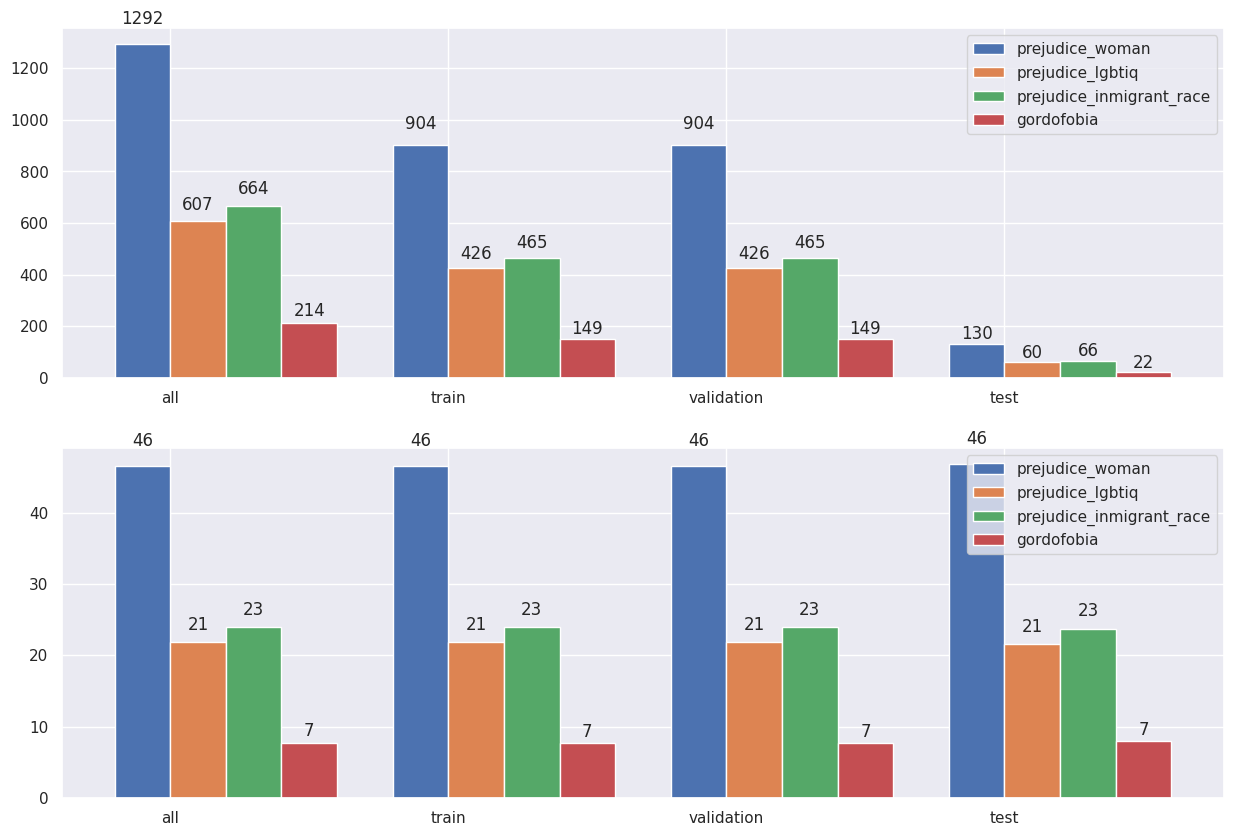

In [ ]:
fig, (ax, ax1) =  plt.subplots(2, 1, figsize=(15, 10))
values = counts.values()
barwidth = 0.2
bars = np.arange(len(groups))
colors = cmap(np.arange(4)*4)
# Get all the groups with the same label
groups = {}
for label in LABELS:
  groups[label] = [counts[label], counts_train[label], counts_val[label], counts_test[label]]

# Print each group
rects = []
for i, group in enumerate(groups):
  rects.append(
      ax.bar(bars+i*barwidth, groups[group], width=barwidth)
      )
# Add the legend

ax.legend(rects, LABELS)
for rect in rects:
  autolabel(rect, ax)
ax.set_xticks(bars+barwidth/2)
groups_title = ["all", "train", "validation", "test"]
ax.set_xticklabels(["all", "train", "validation", "test"])

# Same but in percent
groups = {}
for label in LABELS:
  groups[label] = [
      counts[label]/sum(counts.values())*100,
      counts_train[label]/sum(counts_train.values())*100,
      counts_val[label]/sum(counts_val.values())*100,
      counts_test[label]/sum(counts_test.values())*100
      ]

rects = []
for i, group in enumerate(groups):
  rects.append(
      ax1.bar(bars+i*barwidth, groups[group], width=barwidth)
      )

ax1.legend(rects, LABELS)
for rect in rects:
  autolabel(rect, ax1)

ax1.set_xticks(bars+barwidth/2)
ax1.set_xticklabels(["all", "train", "validation", "test"])
plt.show()

#### Distribución del texto

Para hacer el diagrama de densidad creamos una nueva columna con una máscara asociada a cada campo, de forma que si está etiquetado con la etiquta 1, su mascara será 1, sies con la dos 2, si es con la 3, 8. Es decir la etiqueta corresponde con $1 <<n$


In [ ]:
df_multilabel["label"] = 0
for i, label in enumerate(LABELS):
  op = (1<< i)  
  df_multilabel["label"].mask(df_multilabel[label] == 1, df_multilabel["label"]|op, inplace=True)

La correlación sería:
- 1: Machismo
- 2: Prejuicio lgtbiq
- 3: Machismo y Prejuicio lgtbiq
- 4: Racismo
- 5: Machismo y Racismo
- 6: Prejuicio lgtbiq y Racismo
- 7: Machismo y Prejuicio lgtbiq y Racismo
- 8: Gordofobia
- 9: Machismo y Gordofobia
- 10: Prejuicio lgtbiq y Gordofobia
- 11: Machismo y Prejuicio lgtbiq y Gordofobia
- 12: Racismo y Gordofobia
- 13: Machismo y Racismo y Gordofobia 
- 14: Prejuicio lgtbiq, Gordofobia y racismo
- 15: Machismo y Prejuicio lgtbiq y Racismo y Gordofobia


In [ ]:
labels = [
    "ninguno",
"Machismo",
"Prejuicio lgtbiq",
"Machismo y Prejuicio lgtbiq",
"Racismo",
"Machismo y Racismo",
"Prejuicio lgtbiq y Racismo",
"Machismo y Prejuicio lgtbiq y Racismo",
"Gordofobia",
"Machismo y Gordofobia",
"Prejuicio lgtbiq y Gordofobia",
"Machismo y Prejuicio lgtbiq y Gordofobia",
"Racismo y Gordofobia",
"Machismo y Racismo y Gordofobia",
"Prejuicio lgtbiq, Gordofobia y racismo",
 "Machismo y Prejuicio lgtbiq y Racismo y Gordofobia",
]

In [ ]:
df_multilabel_tmp = df_multilabel.copy()
for i, text in enumerate(labels):
  df_multilabel_tmp.loc[df_multilabel_tmp["label"] == i, "label_text"] = text
  df_multilabel_tmp.loc[df_multilabel_tmp["label"] == i, "label"] = str(i)

df_multilabel_tmp.head()

,text,prejudice_woman,prejudice_lgbtiq,prejudice_inmigrant_race,gordofobia,length,label,label_text
0,Si mi cuerpo está compuesto en un 70% por agua...,0,0,0,1,20,8,Gordofobia
1,"—Doctor, últimamente me veo feo y gordo. ¿Qué ...",0,0,0,1,16,8,Gordofobia
2,- Un aplauso para el asador\n- Callate gordo.....,0,0,0,1,19,8,Gordofobia
3,Me ven en bikini y me llevan a mundo marino.,0,0,0,1,11,8,Gordofobia
4,"MENTION Hombre deja la puta ladilla, que los c...",0,0,0,1,14,8,Gordofobia


/usr/local/lib/python3.9/dist-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
<ipython-input-217-3123f23f4e0e>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_multilabel_tmp, x='length', hue='label_text', legend=True, ax=ax1, palette=colors)
<ipython-input-217-3123f23f4e0e>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_multilabel_tmp, x='length', hue='label_text', legend=True, ax=ax1, palette=colors)


Text(0.5, 1.0, 'Distribución del tamaño de los textos para cada clase')

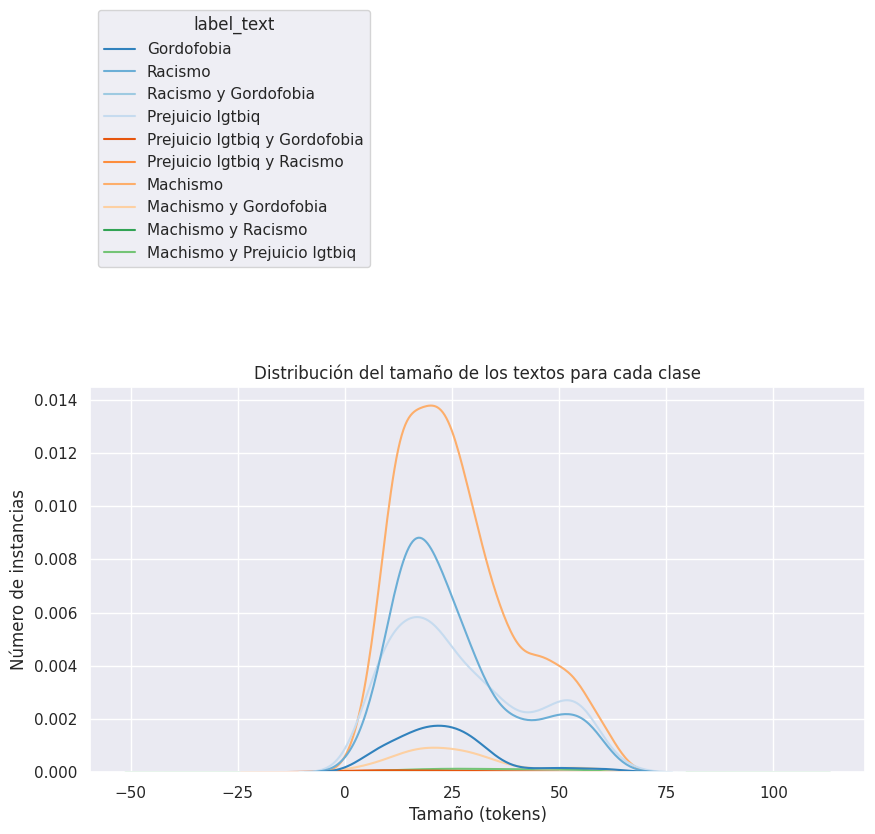

In [ ]:
fig, (ax1) = plt.subplots(1,1, figsize=(10, 5), sharey=True)
colors = cmap(np.arange(len(labels)*2))
sns.kdeplot(data=df_multilabel_tmp, x='length', hue='label_text', legend=True, ax=ax1, palette=colors)

sns.move_legend(ax1, "upper left", bbox_to_anchor=(0, 2))
ax1.set(xlabel = 'Tamaño (tokens)')
ax1.set(ylabel = 'Número de instancias')
ax2.set(xlabel = 'Tamaño (tokens)')
ax2.set(ylabel = 'Número de instancias')
plt.title('Distribución del tamaño de los textos para cada clase')

### labelling de los grupos e intersecciones

10
10


<Axes: >

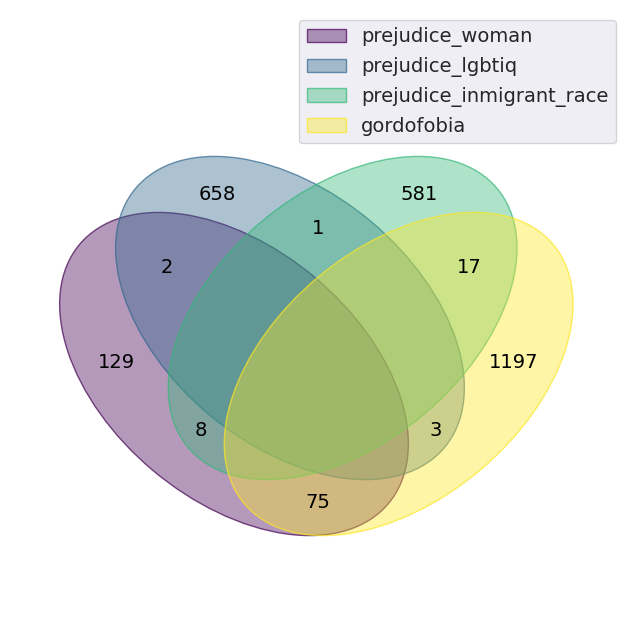

In [ ]:
counts2 = df_multilabel["label"].value_counts()
count_dict = {}

for key, value in zip(counts2.keys(), counts2.values):
  key = '{0:04b}'.format(key)
  count_dict[key] = str(value)

print(len(count_dict.keys()))
print(len(counts2.keys()))
draw_venn(
    petal_labels=count_dict, dataset_labels=LABELS,
    hint_hidden=False, colors=generate_colors(n_colors=4),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)


In [ ]:
LABELS = ["prejudice_woman", "prejudice_lgbtiq", "prejudice_inmigrant_race", "gordofobia"]
counts = {}
counts_train = {}
counts_val = {}
for label in LABELS:
  counts[label] = len(df_multilabel[df_multilabel[label] == 1])
  counts_train[label] = len(df_multilabel_train[df_multilabel_train[label] == 1])
  counts_val[label] = len(df_multilabel_val[df_multilabel_val[label] == 1])

'\nax.legend(rects, LABELS)\nfor rect in rects:\n  autolabel(rect, ax)\nax.set_xticks(bars+barwidth/2)\nax.set_xticklabels(["all", "train", "validation"])\n\n# Same but in percent\ngroups = {}\nfor label in LABELS:\n  groups[label] = [counts[label]/sum(counts.values())*100, counts_train[label]/sum(counts_train.values())*100, counts_val[label]/sum(counts_val.values())*100]\n\nrects = []\nfor i, group in enumerate(groups):\n  rects.append(\n      ax1.bar(bars+i*barwidth, groups[group], width=barwidth)\n      )\n\nax1.legend(rects, LABELS)\nfor rect in rects:\n  autolabel(rect, ax1)\n\nax1.set_xticks(bars+barwidth/2)\nax1.set_xticklabels(["all", "train", "validation"])\nplt.show()\n'

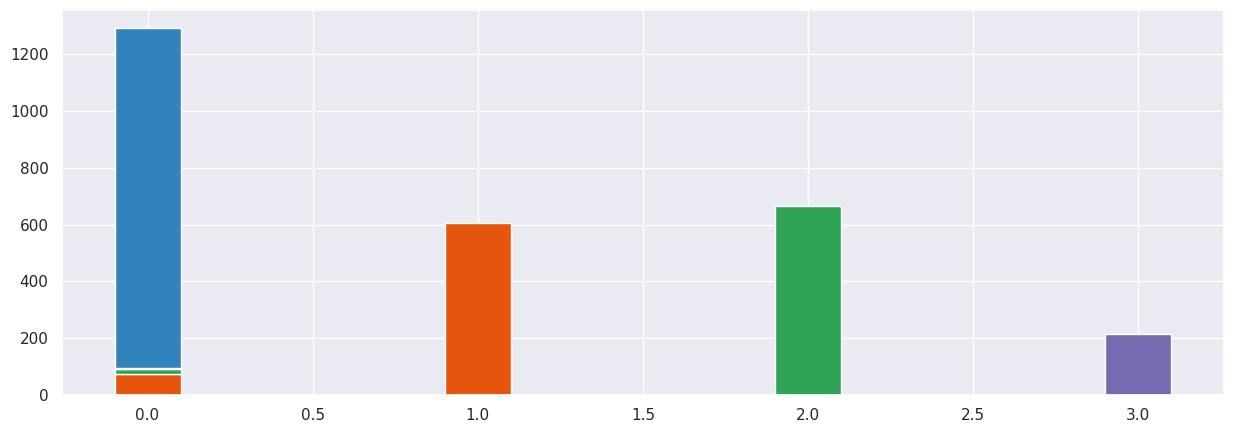

In [ ]:
fig, ax =  plt.subplots(1, 1, figsize=(15, 5))
values = counts.values()
barwidth = 0.2
bars = np.arange(len(LABELS))
colors = cmap(np.arange(len(LABELS))*4)
i=1
ax.bar(bars, values, width=barwidth, color=colors)
height = 0
for label in counts2.keys():
  if label & 1 and label != 1:
    rect = ax.bar([bars[0]], [counts2[label]], width=barwidth, bottom=height, color = colors[i])
    height += rect[0].get_height()
    i += 1

# Add the legend

"""
ax.legend(rects, LABELS)
for rect in rects:
  autolabel(rect, ax)
ax.set_xticks(bars+barwidth/2)
ax.set_xticklabels(["all", "train", "validation"])

# Same but in percent
groups = {}
for label in LABELS:
  groups[label] = [counts[label]/sum(counts.values())*100, counts_train[label]/sum(counts_train.values())*100, counts_val[label]/sum(counts_val.values())*100]

rects = []
for i, group in enumerate(groups):
  rects.append(
      ax1.bar(bars+i*barwidth, groups[group], width=barwidth)
      )

ax1.legend(rects, LABELS)
for rect in rects:
  autolabel(rect, ax1)

ax1.set_xticks(bars+barwidth/2)
ax1.set_xticklabels(["all", "train", "validation"])
plt.show()
"""

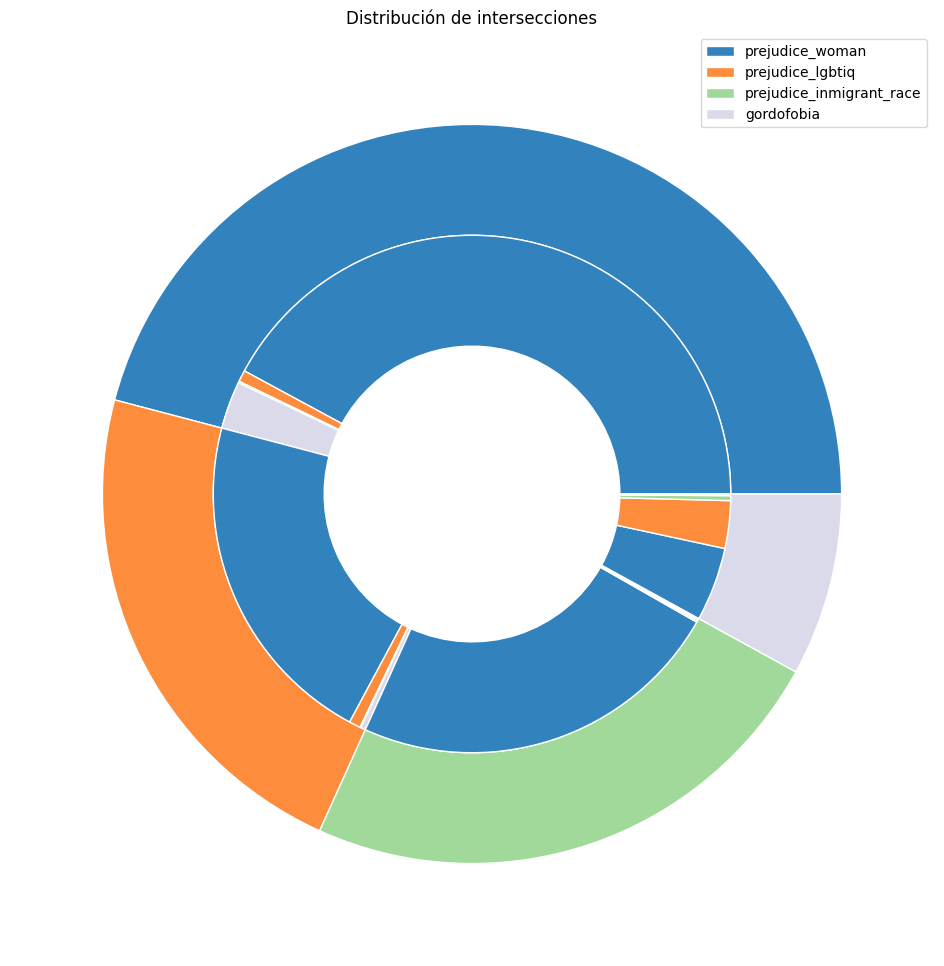

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=IMAGE_SIZE_XXBG)
flat = np.array([list(groups[label].values())[1:] for label in groups])
cmap = plt.colormaps["tab20c"]
size = 0.3
colors = np.arange(len(flat))*5
outer_colors = cmap(colors)
inner_colors = cmap(colors)

ax.pie(flat.sum(axis=1), radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'))

wedges, texts = ax.pie(
    flat.flatten(), radius=1-size,
    colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Distribución de intersecciones')
plt.legend(wedges, groups.keys())
plt.show()



In [ ]:
print("white space")

white space


<ipython-input-24-0ebd013eae8b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_multilabel, x='length', hue="label")
<ipython-input-24-0ebd013eae8b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_multilabel, x='length', hue="label")


<Axes: xlabel='length', ylabel='Density'>

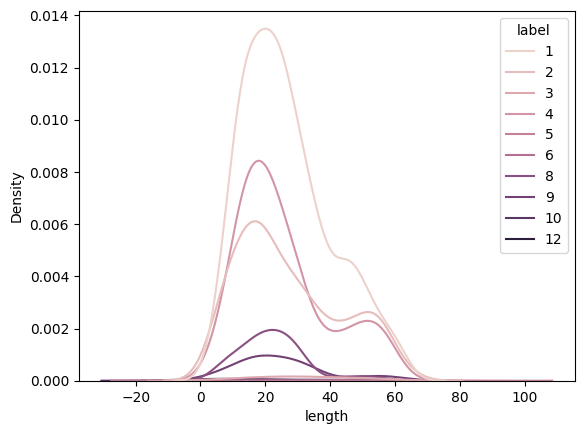

In [ ]:
sns.kdeplot(data=df_multilabel, x='length', hue="label")

### 3. Regresión

In [ ]:
df_regresion = df_train[["tweet", "mean_prejudice", "length"]]
df_regresion = df_regresion.rename(columns={"tweet": "Text", "mean_prejudice": "label"})
df_regresion.head()

,Text,label,length
0,MENTION La primera vez podría tomarse como que...,1.8,39
1,¿Por qué Ricky Martin tardó tanto en salir del...,2.4,17
2,"Van a cambiar las señales, porque un niño cogi...",2.0,28
3,En que se parece una sirena y un transexual? E...,3.8,19
4,La pelotuda esta MENTION comenzó todo ahora c...,2.4,44


(array([  3.,   5.,   5.,  18.,  33.,  40., 117., 113., 131., 164., 151.,
        170., 187., 350., 135.,  79.,  49.,  49.,  34.,  36.]),
 array([0.4 , 0.63, 0.86, 1.09, 1.32, 1.55, 1.78, 2.01, 2.24, 2.47, 2.7 ,
        2.93, 3.16, 3.39, 3.62, 3.85, 4.08, 4.31, 4.54, 4.77, 5.  ]),
 <BarContainer object of 20 artists>)

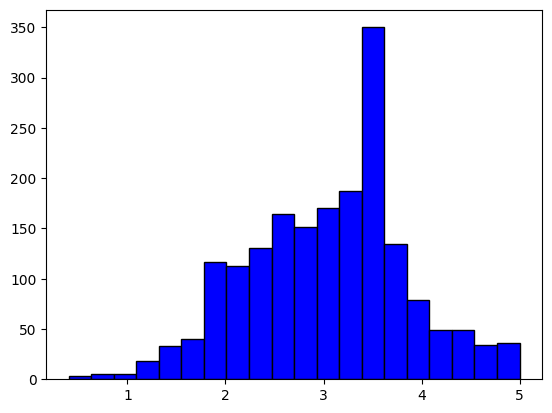

In [ ]:
plt.hist(df_regresion["label"], color="blue", edgecolor="black", bins=20)

<Axes: xlabel='label', ylabel='Proportion'>

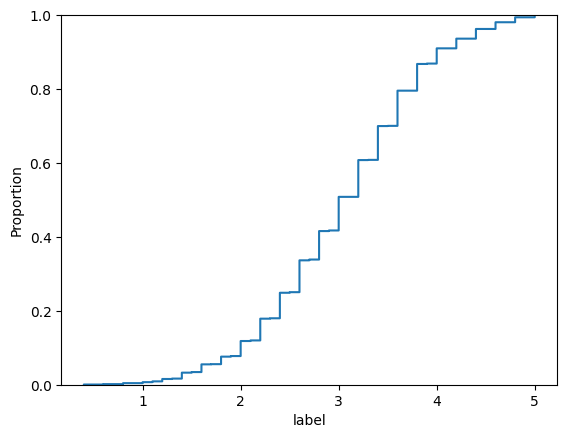

In [ ]:
sns.ecdfplot(data=df_regresion, x="label")